In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import confusion_matrix as conf_mat
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.naive_bayes import BernoulliNB
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
%matplotlib inline

# 1.

In [11]:
df = pd.read_csv("C:\\Users\\Sean\\Desktop\\Fall 2016\\Text_Analytics\\Group Assignment 2\\Yelp Data Restaurant Reviews Ratings.csv")

In [ ]:
df

In [12]:
# Took reviews out of data frame
df_no_rev = df[['stars', 'votes_cool', 'votes_funny', 'votes_useful', 'Cheap',\
                'Moderate', 'Expensive', 'VeryExpensive', 'American', 'Chinese',\
                'French', 'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
                'Mexican', 'Thai', 'Vietnamese', 'Others']]

# Divide the dataframe into train and test sets
train, test = train_test_split(df_no_rev, test_size = 0.6)

# Divide train and test into X and Y
train_X = train[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
train_Y = (train['stars']>=4)
test_X = test[['votes_cool', 'votes_funny', 'votes_useful', 'Cheap', 'Moderate',\
       'Expensive', 'VeryExpensive', 'American', 'Chinese', 'French',\
       'Japanese', 'Indian', 'Italian', 'Greek', 'Mediterranean',\
       'Mexican', 'Thai', 'Vietnamese', 'Others']]
test_Y = (test['stars'] >= 4)

# Turn dataframes into matrices 
train_Xmat = train_X.as_matrix()
train_Ymat = train_Y.as_matrix()
test_Xmat = test_X.as_matrix()
test_Ymat = test_Y.as_matrix()

In [11]:
clf1 = GBC(loss='deviance', learning_rate=0.1, n_estimators=1000,\
          subsample=1.0, min_samples_split=2, min_samples_leaf=1,\
          min_weight_fraction_leaf=0.0, max_depth=4, init=None,\
          random_state=None, max_features=None, verbose=0,\
          max_leaf_nodes=None, warm_start=False, presort='auto')

In [12]:
clf1.fit(train_Xmat, train_Ymat)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [132]:
def model_prediction_summary(Y_actual,Y_predicted,\
                             Y_actual2=None,Y_predicted2=None, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample'):
    
    """
    Shows prediction accuracy as percent correct.
    Plots a confusion matrix.
    """
    
    
    if Y_actual2 == None and Y_predicted2 == None :
        cm = conf_mat(Y_actual,Y_predicted)
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        
        print int(correct), "correct predictions, out of", int(total)
        print "Correct ratio: ",round(correct_rate*100,2),"%"
        labels = ['1','2','3','4','5']
        plt.figure()
        fig = plt.figure()
        ax = fig.add_subplot(111)
        cax = ax.matshow(cm)
        plt.title(title)
        fig.colorbar(cax)
        ax.set_xticklabels([''] + labels)
        ax.set_yticklabels([''] + labels)
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.show()
    elif Y_actual2 != None and Y_predicted2 != None:

        fig, ((ax1), (ax2)) = plt.subplots(nrows=2, ncols=1)
        cm1 = conf_mat(Y_actual,Y_predicted)
        cm2 = conf_mat(Y_actual2,Y_predicted2)
        
        fig = plt.figure(1)
        fig.set_size_inches(8*1.5,6*1.5)
        
        cax1 = ax1.matshow(cm1)
        ax1.set_title(title, y=1.2)
        fig.colorbar(cax1, ax = ax1)
        ax1.set_xticklabels([''] + labels)
        ax1.set_yticklabels([''] + labels)
        ax1.set_xlabel('Predicted')
        ax1.set_ylabel('True')

        cax2 = ax2.matshow(cm2)
        ax2.set_title(title2, y=1.2)
        fig.colorbar(cax2, ax = ax2)
        ax2.set_xticklabels([''] + labels)
        ax2.set_yticklabels([''] + labels)
        ax2.set_xlabel('Predicted')
        ax2.set_ylabel('True')
        
        plt.subplots_adjust(left=None, bottom=None, right=None, top=None,\
                            wspace=None,hspace=None)
        
        fig.tight_layout()
        
        plt.show()
        
        correct = float(sum((pd.DataFrame(Y_actual)[0] == pd.Series(Y_predicted))*1))
        total = float(len(pd.DataFrame(Y_actual)))
        correct_rate = correct/total
        print
        print
        print "In sample predictions:"
        print int(correct), "correct predictions, out of", int(total)
        print "Accuracy: ",round(correct_rate*100,2),"%"
        print
        print
        correct2 = float(sum((pd.DataFrame(Y_actual2)[0] == pd.Series(Y_predicted2))*1))
        total2 = float(len(pd.DataFrame(Y_actual2)))
        correct_rate2 = correct2/total2
        
        print "Out of sample predictions:"
        print int(correct2), "correct predictions, out of", int(total2)
        print "Accuracy: ",round(correct_rate2*100,2),"%"
    else:
        raise ValueError('You done screwed the pooch')

In [14]:
j = clf1.predict(train_Xmat)
k = clf1.predict(test_Xmat)

## Gradient Boosting Classifier Model

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


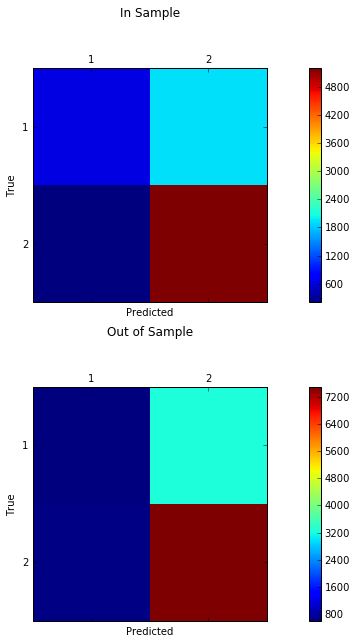



In sample predictions:
5856 correct predictions, out of 7999
Accuracy:  73.21 %


Out of sample predictions:
8099 correct predictions, out of 12000
Accuracy:  67.49 %


In [15]:
model_prediction_summary(train_Ymat,j,\
                             test_Ymat,k, \
                             labels = ['1','2','3','4','5'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

## KNN

In [32]:
kn = knn()

In [33]:
kn.fit(train_Xmat, train_Ymat)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [34]:
L = kn.predict(train_Xmat)
m = kn.predict(test_Xmat)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


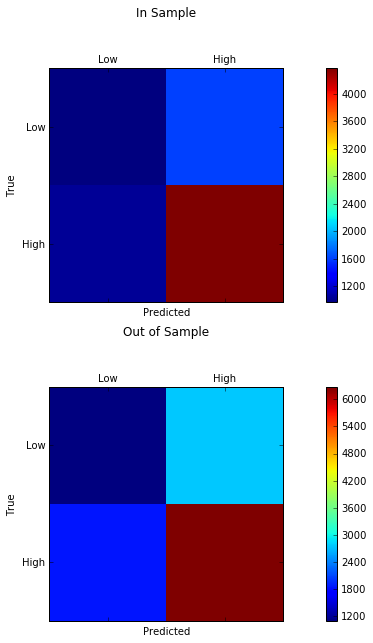



In sample predictions:
5341 correct predictions, out of 7999
Accuracy:  66.77 %


Out of sample predictions:
7377 correct predictions, out of 12000
Accuracy:  61.48 %


In [35]:
model_prediction_summary(train_Ymat,L,\
                             test_Ymat,m, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

## Gradient Boost, factoring in KNN results

In [36]:
train_X_wKNN = train_X
train_X_wKNN = train_X_wKNN.reset_index()
train_X_wKNN["KNN Pred"] = pd.Series(L)

test_X_wKNN = test_X
test_X_wKNN = test_X_wKNN.reset_index()
test_X_wKNN["KNN Pred"] = pd.Series(m)

# Turn dataframes into matrices 
train_Xmat_wKNN = train_X_wKNN.as_matrix()
train_Ymat = train_Y.as_matrix()
test_Xmat_wKNN = test_X_wKNN.as_matrix()
test_Ymat = test_Y.as_matrix()

In [37]:
clf2 = GBC(loss='deviance', learning_rate=0.1, n_estimators=1000,\
          subsample=1.0, min_samples_split=2, min_samples_leaf=1,\
          min_weight_fraction_leaf=0.0, max_depth=4, init=None,\
          random_state=None, max_features=None, verbose=0,\
          max_leaf_nodes=None, warm_start=False, presort='auto')

In [38]:
clf2.fit(train_Xmat_wKNN, train_Ymat)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=4, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1000,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [39]:
n = clf2.predict(train_Xmat_wKNN)
o = clf2.predict(test_Xmat_wKNN)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:30: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


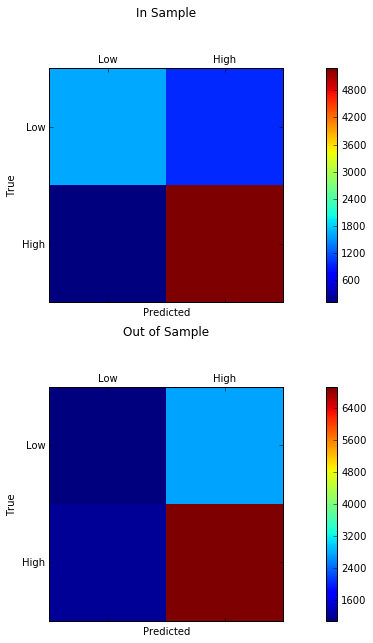



In sample predictions:
6904 correct predictions, out of 7999
Accuracy:  86.31 %


Out of sample predictions:
8019 correct predictions, out of 12000
Accuracy:  66.83 %


In [40]:
model_prediction_summary(train_Ymat,n,\
                             test_Ymat,o, \
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

# 2.

In [13]:
rev_df = df[["stars","Review"]]

In [194]:
train_rev, test_rev = train_test_split(rev_df, train_size = .4)

train_revX = train_rev["Review"]
train_revX = train_revX.reset_index()
train_revX = train_revX["Review"]

train_revY = (train_rev["stars"]>=4)*1
train_revY = train_revY.reset_index()
train_revY = train_revY["stars"]

test_revX = test_rev["Review"]
test_revX = test_revX.reset_index()
test_revX = test_revX["Review"]

test_revY = (test_rev["stars"]>=4)*1
test_revY = test_revY.reset_index()
test_revY = test_revY["stars"]

train_revXmat = train_revX.as_matrix()
train_revYmat = train_revY.as_matrix()
test_revXmat = test_revX.as_matrix()
test_revYmat = test_revY.as_matrix()

In [255]:
def word_formatter(Xseries,Yseries):
    Xseries_token = Xseries.map(lambda x: word_tokenize(x.decode("utf8")))
    filtered_words = Xseries_token.map(lambda x: [word for word in x if word not in stopwords.words('english')])
    Xseries_comb = filtered_words.map(lambda x: " ".join(x))
    Yseries_lab = Yseries.apply(lambda x: 'pos' if x==1 else 'neg')
    zipped = zip(Xseries_comb,Yseries_lab)
    all_words = set(word.lower() for passage in zipped for word in \
        word_tokenize(passage[0]))
    t = [({word: (word in word_tokenize(x[0])) for word in all_words}, \
        x[1]) for x in zipped]
    return t

In [ ]:
# Do not re-run this block unless you have 5 hours to spare

train_form = word_formatter(train_revX,train_revY)

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(train_form)
classifier.show_most_informative_features()

In [ ]:
def word_feats(words):
    return dict([(word, True) for word in words])

In [ ]:
Xseries_token = test_revX.map(lambda x: word_tokenize(x.decode("utf8")))
filtered_words = Xseries_token.map(lambda x: [word for word in x if word not in stopwords.words('english')])
word_f = filtered_words.map(lambda x: word_feats(x))
prediction = word_f.map(lambda x: classifier.classify(x))

In [ ]:
pred_mat = prediction.as_matrix()
test_revY_mat = test_revY.apply(lambda x: 'pos' if x==1 else 'neg').as_matrix()

In [ ]:
model_prediction_summary(test_revY_mat,pred_mat,\
                             labels = ['Low','High'],\
                             title = 'In Sample',
                             title2 = 'Out of Sample')

In [ ]:
train_token = train_revX.map(lambda x: word_tokenize(x.decode("utf8")))
train_pos = train_token.map(lambda x: nltk.pos_tag(x))
train_comb = train_token.map(lambda x: " ".join(x))

In [64]:
train_revY2 = train_revY.apply(lambda x: 'pos' if x==1 else 'neg')

In [77]:
train_zip = zip(train_comb,train_revY2)

In [195]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.corpus import stopwords
import numpy as np
import numpy.linalg as LA

train_set = ["The sky is blue.", "The sun is bright."] #Documents
test_set = ["The sun in the sky is bright."] #Query
stopWords = stopwords.words('english')

vectorizer = CountVectorizer(stop_words = stopWords)
#print vectorizer
transformer = TfidfTransformer()
#print transformer

trainVectorizerArray = vectorizer.fit_transform(train_set).toarray()
testVectorizerArray = vectorizer.transform(test_set).toarray()
print 'Fit Vectorizer to train set', trainVectorizerArray
print 'Transform Vectorizer to test set', testVectorizerArray

transformer.fit(trainVectorizerArray)
print
print transformer.transform(trainVectorizerArray).toarray()

transformer.fit(testVectorizerArray)
print 
tfidf = transformer.transform(testVectorizerArray)
print tfidf.todense()

Fit Vectorizer to train set [[1 0 1 0]
 [0 1 0 1]]
Transform Vectorizer to test set [[0 1 1 1]]

[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]]

[[ 0.          0.57735027  0.57735027  0.57735027]]


In [229]:

#from sklearn.datasets import fetch_20newsgroups
#twenty = fetch_20newsgroups()

tfidf[1:2]

from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[1:2], tfidf).flatten()
cosine_similarities

related_docs_indices = cosine_similarities.argsort()[:-5:-1]
print related_docs_indices

print cosine_similarities[related_docs_indices]

for i in related_docs_indices:
    print train_revY.ix[i]

#twenty

[   1 6902 3436 2439]
[ 1.          0.33444704  0.30095758  0.26509017]
0
1
1
0


## TF-IDF COSINE SIMILARITY MODEL

In [251]:
from sklearn.metrics.pairwise import linear_kernel
from sklearn import linear_model


def cos_similarity_classifier(train_revX_Series,train_revY_Series,\
                              test_revX_Series=None,\
                              nvotes=1):
    
    if test_revX_Series==None:
        train_revXmat = train_revX_Series.as_matrix()

        tfidf = TfidfVectorizer().fit_transform(train_revXmat)





        In_sample_y_pred = []


    
        for i in range(len(train_revYmat)):
            cosine_similarities = linear_kernel(tfidf[i:i+1], tfidf).flatten()

            related_docs_indices = cosine_similarities.argsort()[:(-1-nvotes):-1]


            votes = []

            for j in range(nvotes-1):
                votes.append(train_revY_Series.ix[related_docs_indices[j+1]])
            pos = 0
            neg = 0
            for k in range(nvotes-1):
                pos = pos + votes[k]
                neg = (neg - votes[k])**2
            if neg > pos:
                In_sample_y_pred.append(0)
            else:
                In_sample_y_pred.append(1)

            return In_sample_y_pred
    else:
        train_revXmat = train_revX_Series.as_matrix()

        tfidf = TfidfVectorizer().fit_transform(train_revXmat)
        
        In_sample_y_pred = []
        
        test = vectorizer.transform(test_revX_Series)
        clf = linear_model.SGDClassifier(loss='log')
        clf.fit(X,Y)
        x=clf.predict(test)
        
        returnx


5421 correct predictions, out of 7999
Correct ratio:  67.77 %


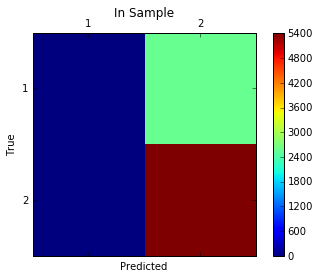

In [246]:
model_prediction_summary(train_revYmat,In_sample_y_pred,train_revXmat,\
                             labels = ['Neg','Pos'],\
                             title = 'In Sample')

In [252]:
cos_similarity_classifier(train_revX,train_revY,\
                              test_revXmat,\
                              nvotes=1)

C:\Users\Sean\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


NameError: global name 'X' is not defined